The student exam performance: 

      gender race/ethnicity parental level of education         lunch  \
0     female        group B           bachelor's degree      standard   
1     female        group C                some college      standard   
2     female        group B             master's degree      standard   
3       male        group A          associate's degree  free/reduced   
4       male        group C                some college      standard   
...      ...            ...                         ...           ...   
996   female        group E             master's degree      standard   
997     male        group C                 high school  free/reduced   
998   female        group C                 high school  free/reduced   
999   female        group D                some college      standard   
1000  female        group D                some college  free/reduced   

     test preparation course  math score  reading score  writing score  
0                 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
gender,1.000000,0.057148,0.027005,-0.024821,0.004731,0.169119,-0.242570,-0.300121
race_ethnicity,0.057148,1.000000,-0.062710,-0.031075,0.009475,0.194891,0.102710,0.121033
parental_level_of_education,0.027005,-0.062710,1.000000,-0.014510,0.011794,-0.138985,-0.143230,-0.192152
lunch,-0.024821,-0.031075,-0.014510,1.000000,0.016033,-0.351339,-0.230022,-0.246171
test_preparation_course,0.004731,0.009475,0.011794,0.016033,1.000000,0.178772,0.242568,0.313548
math_score,0.169119,0.194891,-0.138985,-0.351339,0.178772,1.000000,0.817713,0.802754
reading_score,-0.242570,0.102710,-0.143230,-0.230022,0.242568,0.817713,1.000000,0.954621
writing_score,-0.300121,0.121033,-0.192152,-0.246171,0.313548,0.802754,0.954621,1.000000



The train and test datasets: 
     race_ethnicity  parental_level_of_education  lunch  \
943               1                            4      0   
783               0                            4      1   
782               0                            2      0   
494               1                            0      0   
714               3                            2      0   
..              ...                          ...    ...   
953               4                            5      1   
990               3                            1      1   
467               3                            3      1   
833               2                            0      0   
900               3                            5      0   

     test_preparation_course  
943                        0  
783                        1  
782                        0  
494                        0  
714                        0  
..                       ...  
953                        0  
990         

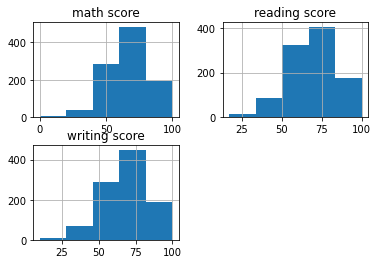

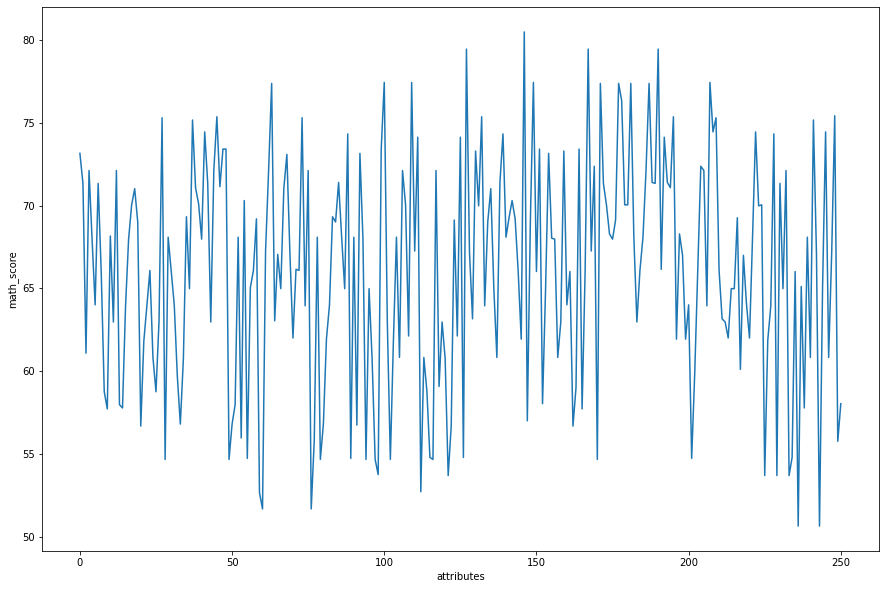

In [60]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def main(): 
    
    #read and print the data
    data_file = pd.read_csv("https://raw.githubusercontent.com/Amal211/python/main/StudentsPerformance.csv")
    print("The student exam performance: \n\n{}" .format(data_file))
    
    #return and print information about the dataframe 
    info_1 = data_file.shape
    info_2 = data_file.info
    info_3 = data_file.columns
    info_4 = data_file.dtypes
    info_5 = data_file.describe()
   
    print("\nThe dimentionality of the exam performance data frame: \n{}" .format(info_1))
    print("\nThe exam performance data frame summary: \n{}" .format(info_2))
    print("\nThe columns labels of the exam performance data fram: \n{}" .format(info_3))
    print("\nThe data types of each column in the exam performance data fram: \n{}" .format(info_4))
    print("\nDescrptive statistics of numeric column in the exam performance data fram: \n{}" .format(info_5))
    
    #find missing values in each columns
    missing = data_file.apply(lambda x: sum(x.isnull()), axis=0) 
    print("\nThe miising values by columns: \n {}" .format(missing))
    
    #find the duplicated values in the datafram
    duplicate = data_file.duplicated()
    print("\nThe duplicated values: \n {}" .format(duplicate))
    
    #replace missing values
    replace_1 = data_file["gender"].fillna(data_file["gender"].mode()[0], inplace=True)
    replace_2 = data_file["race/ethnicity"].fillna(data_file["race/ethnicity"].mode()[0], inplace=True)
    
    
    #compare between students scores in math, reading, and writing
    compare_1 = data_file[["math score", "reading score", "writing score"]].mean()
    compare_2 = data_file[["math score", "reading score", "writing score"]].mode()
    print("\nThe average students score for different subjects: \n{}" .format(compare_1))
    print("\nThe most frequent student score for different subjects: \n{}" .format(compare_2))
    
    #plot the data frame to show the different subject scores
    data_file.hist(bins=5)
    
    #compare between male and female exam scores in different subject
    compare_3 = data_file[["gender", "math score", "reading score", "writing score"]].groupby("gender").mean()
    print("\nThe average students score for different subjects by gender: \n{}" .format(compare_3))
    
    #replace spaces and other special characters with underscore
    data_file.columns = data_file.columns.str.replace('[ ]','_')
    data_file.columns = data_file.columns.str.replace('[/]','_')
    
    
    #converting categorical variables into integer before test for correlation
    data_file["gender"] = pd.factorize(data_file.gender)[0]
    data_file["race_ethnicity"] = pd.factorize(data_file.race_ethnicity)[0]
    data_file["parental_level_of_education"] = pd.factorize(data_file.parental_level_of_education)[0]
    data_file["lunch"] = pd.factorize(data_file.lunch)[0]
    data_file["test_preparation_course"] = pd.factorize(data_file.test_preparation_course)[0]
    
    
    #find if there any correlation between any of the dataframe variables
    try:
      rel_1 = data_file.corr(method ='pearson')
      display(rel_1)
    except:
      print("\nSomthing went wrong!\n")

    #create train and test datasets
    x = data_file.iloc[:, 1:5]
    y = data_file['math_score']
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    
    print("\nThe train and test datasets: \n{}" .format(x_train, x_test, y_train, y_test))
    
    
    #creat the linear model and fit the model for prediction
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_predict = lr.predict(x_test)
    
    print("\nPrediction of student's scores: \n{}" .format(y_predict))
    
    #create coefficients
    ce = lr.coef_
    data_1 = pd.DataFrame(zip(x.columns, ce), columns = ['attribute', 'math_score'])
    data_1 = data_1.append({'attribute':'intercept', 'math_score': lr.intercept_}, ignore_index = True)

    print("\nCoefficient values: \n{}" .format(data_1))
    
    #visualizing student math score   
    plt.figure(figsize = (15, 10))
    plt.xlabel('attributes')
    plt.ylabel('math_score')
    plt.plot(y_predict)
    plt.show()
      

if __name__ == "__main__" :
    main() 
    
    